## Import library & Load data

In [7]:
import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## EDA

In [52]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

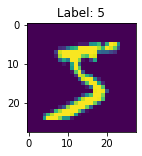

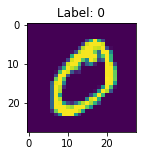

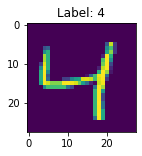

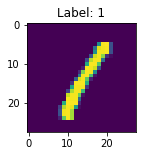

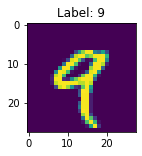

In [53]:
for i in range(0, 5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_train[i][:, :])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

## Prepare data

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32")/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


## Train & Evaluate model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras import backed as K

batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=["accuracy"])

In [15]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

model.save("mnist.h5")

Epoch 1/50
469/469 [==============================] - 18s 39ms/step - loss: 2.3052 - accuracy: 0.0951 - val_loss: 2.2881 - val_accuracy: 0.1642
Epoch 2/50
469/469 [==============================] - 18s 38ms/step - loss: 2.2863 - accuracy: 0.1415 - val_loss: 2.2673 - val_accuracy: 0.3047
Epoch 3/50
469/469 [==============================] - 18s 38ms/step - loss: 2.2670 - accuracy: 0.1942 - val_loss: 2.2443 - val_accuracy: 0.3968
Epoch 4/50
469/469 [==============================] - 18s 38ms/step - loss: 2.2465 - accuracy: 0.2470 - val_loss: 2.2177 - val_accuracy: 0.4658
Epoch 5/50
469/469 [==============================] - 18s 38ms/step - loss: 2.2206 - accuracy: 0.3023 - val_loss: 2.1857 - val_accuracy: 0.5259
Epoch 6/50
469/469 [==============================] - 18s 38ms/step - loss: 2.1898 - accuracy: 0.3500 - val_loss: 2.1464 - val_accuracy: 0.5709
Epoch 7/50
469/469 [==============================] - 18s 38ms/step - loss: 2.1523 - accuracy: 0.3927 - val_loss: 2.0969 - val_accuracy: